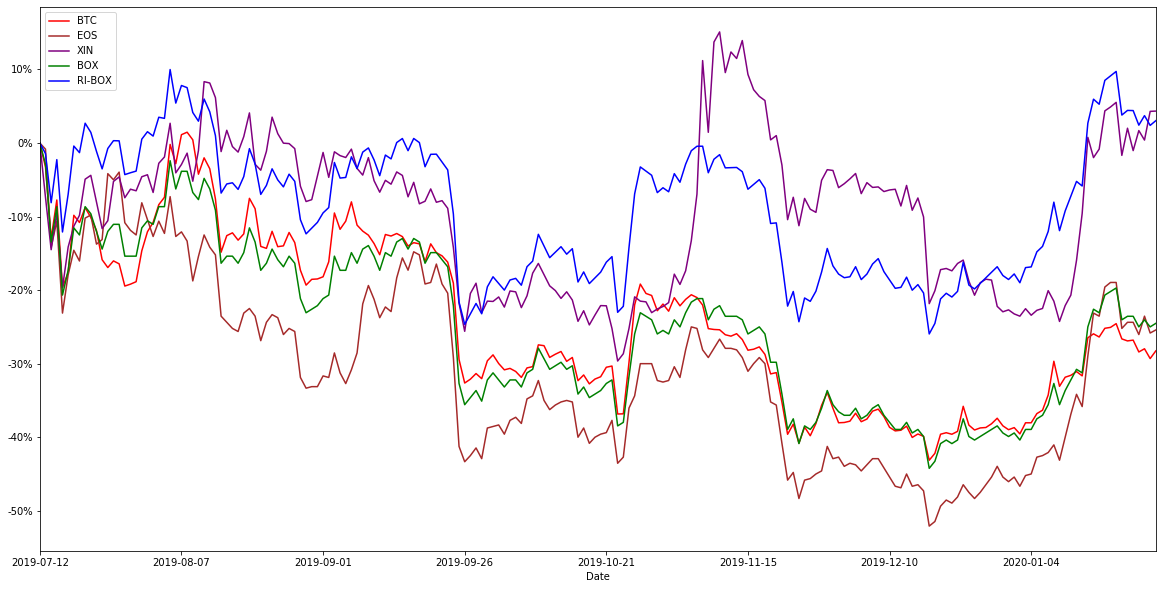

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
from re import sub

series = pd.read_csv(
    "https://raw.githubusercontent.com/xiaolai/regular-investing-in-box/master/data/box_price_history.txt",
    sep="\t"
)

number_of_rows = series.shape[0]

daily_invested = 1

# add column "Total Invested"
total_invested = []
for i in range(0, number_of_rows):
    total_invested.append((i+1)*daily_invested)
series["Total Invested"] = total_invested

# add column "Daily Bought"
BOX_daily_bought = []
for i in range(0, number_of_rows):
    BOX_daily_bought.append(daily_invested/float(sub(r"[^\d.]", "", series.at[i, "BOX Price"])))

series["BOX Bought"] = BOX_daily_bought

# add column "Value Accumulated"
value_accumulated = []
for i in range(0, number_of_rows):
    holding = 0
    for j in range(0, i+1):
        holding += series.at[j, "BOX Bought"]
    value_accumulated.append(holding * float(sub(r"[^\d.]", "", series.at[i, "BOX Price"])))
series["Value Accumulated"] = value_accumulated    

# add price changes
btc_price_change = []
eos_price_change = []
xin_price_change = []
box_price_change = []
ri_box_change = []
for i in range(0, number_of_rows):
    btc_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "BTC Price"]))/float(sub(r"[^\d.]", "", series.at[0, "BTC Price"])) - 1)
    eos_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "EOS Price"]))/float(sub(r"[^\d.]", "", series.at[0, "EOS Price"])) - 1)
    xin_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "XIN Price"]))/float(sub(r"[^\d.]", "", series.at[0, "XIN Price"])) - 1)
    box_price_change.append(float(sub(r"[^\d.]", "", series.at[i, "BOX Price"]))/float(sub(r"[^\d.]", "", series.at[0, "BOX Price"])) - 1)    
    ri_box_change.append(series.at[i, "Value Accumulated"]/series.at[i, "Total Invested"] - 1)
series["BTC"] = btc_price_change
series["EOS"] = eos_price_change
series["XIN"] = xin_price_change
series["BOX"] = box_price_change
series["RI-BOX"] = ri_box_change

# draw the figure
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
series.plot(kind='line', x='Date', y='BTC', ax=ax, figsize = (20,10), color="red")
series.plot(kind='line', x='Date', y='EOS', ax=ax, figsize = (20,10), color="brown")
series.plot(kind='line', x='Date', y='XIN', ax=ax, figsize = (20,10), color="purple")
series.plot(kind='line', x='Date', y='BOX', ax=ax, figsize = (20,10), color="green")
series.plot(kind='line', x='Date', y='RI-BOX', ax=ax, figsize = (20,10), color="blue")

# plt.show()
plt.savefig("box-historical-price-change.png", transparent=True)